<a href="https://colab.research.google.com/github/zahidnubcse/Python/blob/main/skin_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
!pip install tensorflow keras matplotlib opencv-python scikit-learn

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator








In [4]:
#load dataset from drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [18]:
#dataset path
from google.colab import drive
drive.mount('/content/drive')

# Path to your datase
dataset_path = "/content/drive/MyDrive/skin-disease-datasaet/"
train_dir = dataset_path + "train_set/"
test_dir  = dataset_path + "test_set/"

!ls "/content/drive/MyDrive/skin-disease-datasaet/"





Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
test_set  train_set


In [21]:
#Define image size, batch size, and generators

img_size = 128   # you can use 128x128, or 224x224 if dataset is large
batch_size = 32

# Training data generator with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

# Test data generator (only rescaling)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow from directory
train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode="categorical"
)

test_gen = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode="categorical"
)


Found 924 images belonging to 8 classes.
Found 233 images belonging to 8 classes.


In [22]:
#Build CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation="relu", input_shape=(img_size, img_size, 3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation="relu"),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation="relu"),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(train_gen.num_classes, activation="softmax")
])

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │         1,032 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,672 (12.61 MB)

 Trainable params: 3,305,672 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
#Train Model

history = model.fit(
    train_gen,
    validation_data=test_gen,
    epochs=15
)


Epoch 1/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.4622 - loss: 1.4255 - val_accuracy: 0.5536 - val_loss: 1.2733
Epoch 2/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.4720 - loss: 1.3906 - val_accuracy: 0.5837 - val_loss: 1.1848
Epoch 3/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.5317 - loss: 1.3101 - val_accuracy: 0.6009 - val_loss: 1.1877
Epoch 4/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.5504 - loss: 1.2808 - val_accuracy: 0.6524 - val_loss: 1.1277
Epoch 5/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.5539 - loss: 1.2643 - val_accuracy: 0.5880 - val_loss: 1.1341
Epoch 6/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.5212 - loss: 1.2821 - val_accuracy: 0.5923 - val_loss: 1.1604
Epoch 7/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.5103 - loss: 1.3115 - val_accuracy: 0.5880 - val_loss: 1.1515
Epoch 8/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.5589 - loss: 1.2483 - val_accuracy: 0.6094 - val_loss:

8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 291ms/step - accuracy: 0.6906 - loss: 0.8647
Test Accuracy: 67.81%


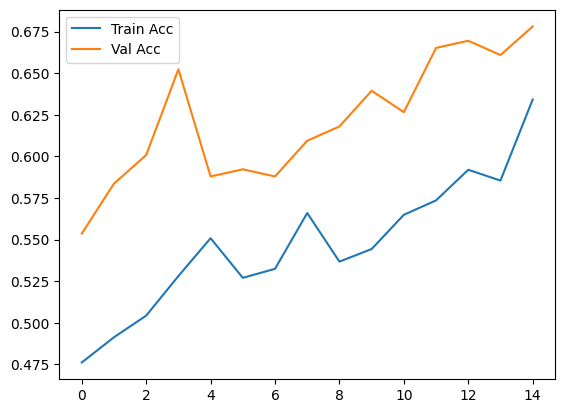

In [26]:
# Evaluate model
loss, acc = model.evaluate(test_gen)
print(f"Test Accuracy: {acc*100:.2f}%")

# Plot training history
plt.plot(history.history['accuracy'], label="Train Acc")
plt.plot(history.history['val_accuracy'], label="Val Acc")
plt.legend()
plt.show()
